In [1]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import numpy as np
import pandas as pd
import cospar as cs
import scipy.stats as stats
import cospar as cs
from scipy.stats import rankdata
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/data/jiangjunyao/public/cospar data/LARRY_adata_preprocessed.h5ad')
adata

AnnData object with n_obs × n_vars = 49116 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'growth_rate_raw', 'growth_rate_smooth'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering'
    obsm: 'X_clone', 'X_emb', 'X_pca'

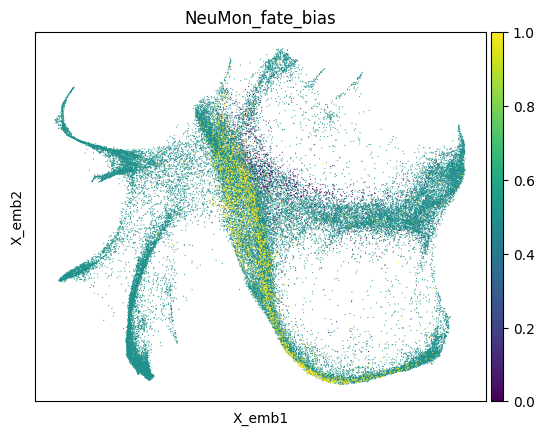

In [5]:
sc.pl.embedding(adata,color='NeuMon_fate_bias',basis='X_emb')

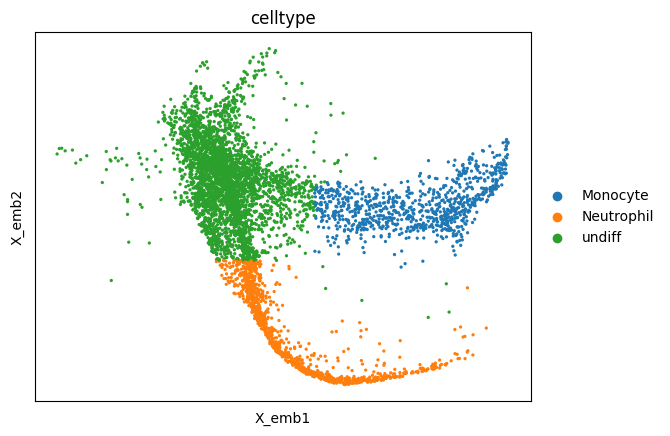

In [15]:
adata2 = adata[adata.obs['NeuMon_fate_bias']!=0.5]
adata2 = adata2[adata2.obs.state_info.isin(['Monocyte','Neutrophil','undiff'])]
adata2.obs['celltype'] = adata2.obs['state_info']
sc.pl.embedding(adata2,color=['celltype'],basis='X_emb')

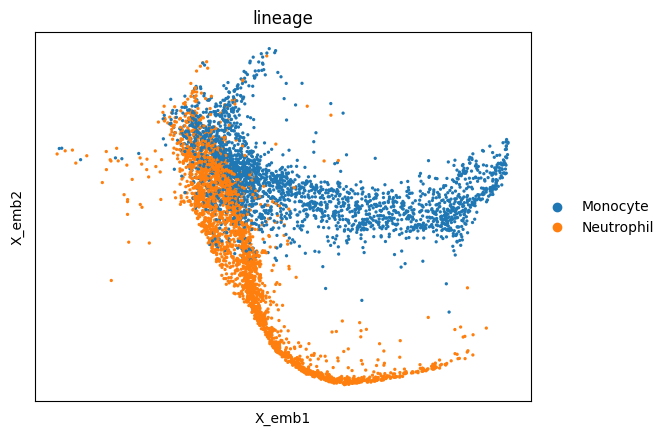

In [16]:
adata2.obs['lineage'] = adata2.obs['state_info'].tolist()
condition = (adata2.obs['state_info'] == 'undiff') & (adata2.obs['NeuMon_fate_bias'] >0.5)

adata2.obs.loc[condition, 'lineage'] = 'Neutrophil'
condition = (adata2.obs['state_info'] == 'undiff') & (adata2.obs['NeuMon_fate_bias'] <0.5)

adata2.obs.loc[condition, 'lineage'] = 'Monocyte'
sc.pl.embedding(adata2,color=['lineage'],basis='X_emb')

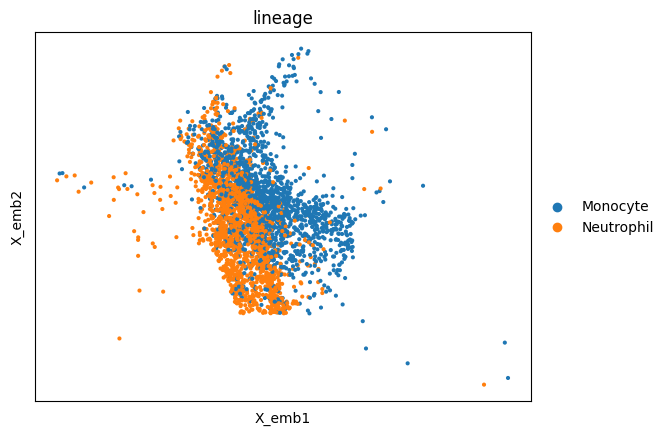

In [17]:
adata3 = adata2[adata2.obs.celltype=='undiff']
sc.pl.embedding(adata3,color=['lineage'],basis='X_emb')